<a href="https://colab.research.google.com/github/aakanksha9977/aak/blob/main/Copy_of_HW1_Aakanksha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 Guide

1. Save a copy of this `.ipynb` file to your Google Drive or PC.  
2. Rename the file from **`HW1.ipynb`** to **`HW1_(your name).ipynb`**.  
3. Complete the code cells below by following the given instructions.  
4. Save your work and upload the `.ipynb` file to Canvas.  
   - Do **NOT** clear the outputs; leave your results visible.  
5. ⚠️ **IMPORTANT**: Convert your `.ipynb` file to a `.PDF` and upload them **together**.
    - Go to the top menu → **File → Print → Save as PDF**.  


.

.


# [HW 1-1] Data Indexing
Extract the **sensor signals (excluding the time column)** from **0.02 to 0.12 seconds**  
by indexing the `ExampleData` provided from GitHub.  

* Data link: 'https://github.com/ljwg3000/UNT_MEEN/blob/main/AI_tutorial/Week2/ExampleData?raw=true'
* Index the data as DataFrame format
* Refer to DA1_Code1

In [ ]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Acess to google drive
from google.colab import drive
drive.mount('/content/drive')
# Load ExampleData from Github
# Load data with column names
path = 'https://github.com/ljwg3000/UNT_MEEN/blob/main/AI_tutorial/Week2/ExampleData?raw=true' # you can define data path as a variable first
ExampleData_withNames = pd.read_csv(path, sep=',',names=['time(s)', 'Acceleration(g)', 'Voltage(V)', 'Current(kA)'])
ExampleData_withNames

# Data indexing
StartPoint = np.where(ExampleData_withNames.iloc[:,0].values == 0.02)[0][0]
EndPoint   = np.where(ExampleData_withNames.iloc[:,0].values == 0.12)[0][0]

StartPoint, EndPoint


# Define the indexed data as 'SensorData'
SensorData = ExampleData_withNames.iloc[StartPoint:EndPoint, 1:]
SensorData

SensorData

Mounted at /content/drive


,Acceleration(g),Voltage(V),Current(kA)
256,-0.40050,1.6026,3.6504
257,-0.47753,1.5377,3.5958
258,-0.58822,1.4383,3.5342
259,-0.73779,1.3535,3.4622
260,-0.85521,1.2843,3.3858
...,...,...,...
1531,-0.21017,1.7923,5.1564
1532,-0.44388,1.7312,5.1246
1533,-0.43116,1.6670,5.0836
1534,-0.66899,1.6050,5.0335


.

.

# [HW 1-2] Data Processing & Plotting
For each sensor signal in `SensorData`,  
calculate the **mean value every 0.01 seconds** and plot how it changes over time.  

* Refer to DA1_Code3

In [ ]:
Mean_Values = np.zeros((10, SensorData.shape[1]))
Mean_Values

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
for i in range(10):
  print (i)

0
1
2
3
4
5
6
7
8
9


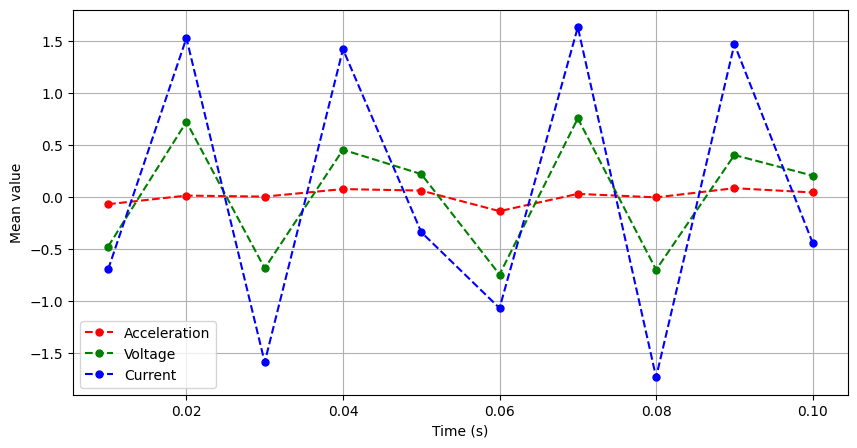

In [ ]:
# Import (additional) packages


# Feature extraction
window_size = 128  # samples per 0.01s
num_windows = int(SensorData.shape[0]/window_size)
Mean_Values = np.zeros((num_windows, SensorData.shape[1]))
for sensor in range(SensorData.shape[1]):
    for window in range(num_windows):
        start = window * window_size
        end = start + window_size
        Mean_Values[window, sensor] = np.mean(SensorData.iloc[start:end,sensor])
TimeArr = np.arange(1, num_windows+1) * 0.01  # 0.01s steps
# Plot graphs
plt.figure(figsize=(10,5))
plt.plot(TimeArr, Mean_Values[:,0], ls='--', c='r', marker='o', ms=5, mfc='r', mec='r')
plt.plot(TimeArr, Mean_Values[:,1], ls='--', c='g', marker='o', ms=5, mfc='g', mec='g')
plt.plot(TimeArr, Mean_Values[:,2], ls='--', c='b', marker='o', ms=5, mfc='b', mec='b')
plt.xlabel('Time (s)')
plt.ylabel('Mean value')
plt.legend(['Acceleration', 'Voltage', 'Current'])
plt.grid()
plt.show()